# Kırık Tespiti Projesi

Bu proje, önkol kemiğinin MRI görüntülerini işleyerek kemik yapısını belirleme ve potansiyel kırıkları tespit etme amacı taşımaktadır. Çalışma, görüntü ön işleme, segmentasyon ve kırık tespiti gibi temel görüntü işleme adımlarını içermektedir. Projede, doğru sonuçlar elde etmek için farklı yöntemler ve pipeline kombinasyonları denenmiştir.


## Gauss Piramidi (diğer adımlarda kullanılacağı için bu kısıma eklendi): 

Gauss Piramidi Nedir?
Gauss Piramidi, bir görüntüyü farklı çözünürlük seviyelerinde temsil eden bir tekniktir. Her seviyede detaylar azalır, genel yapılar korunur.

Bu Çalışmada Neden Kullanıldı?
Görüntülerin farklı çözünürlüklerdeki detay ve desen özelliklerini analiz etmek için kullanıldı. Bu çıktılar, desen ve kenar kodlama süreçleriyle birleştirilerek daha kapsamlı bir analiz yapılacak.

processed_kirik_6_level_0.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png
processed_kirik_6_level_1.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png
processed_kirik_6_level_2.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png
processed_kirik_6_level_3.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png


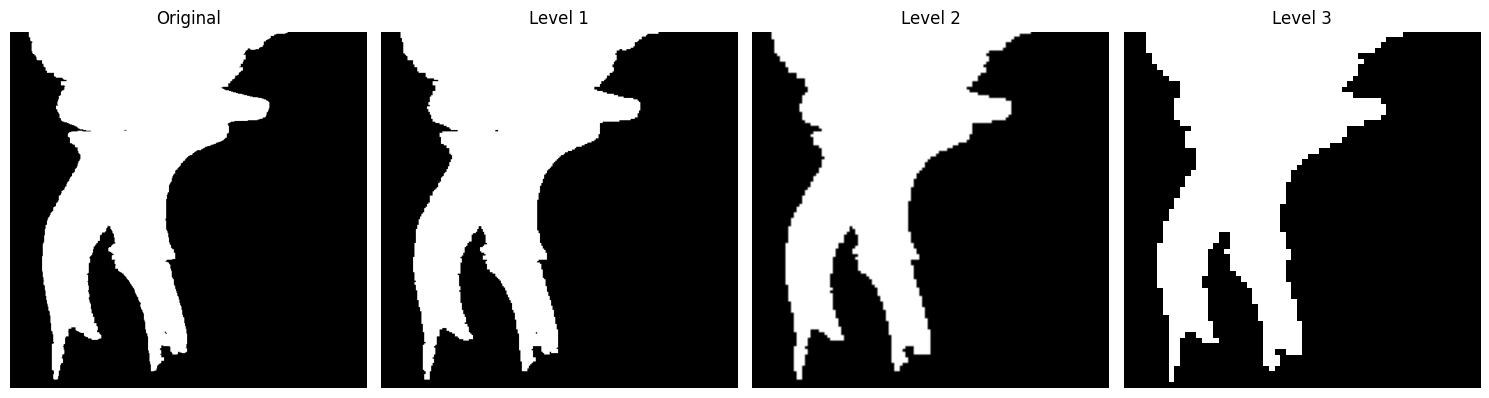

processed_kirik_3_level_0.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png
processed_kirik_3_level_1.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png
processed_kirik_3_level_2.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png
processed_kirik_3_level_3.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png


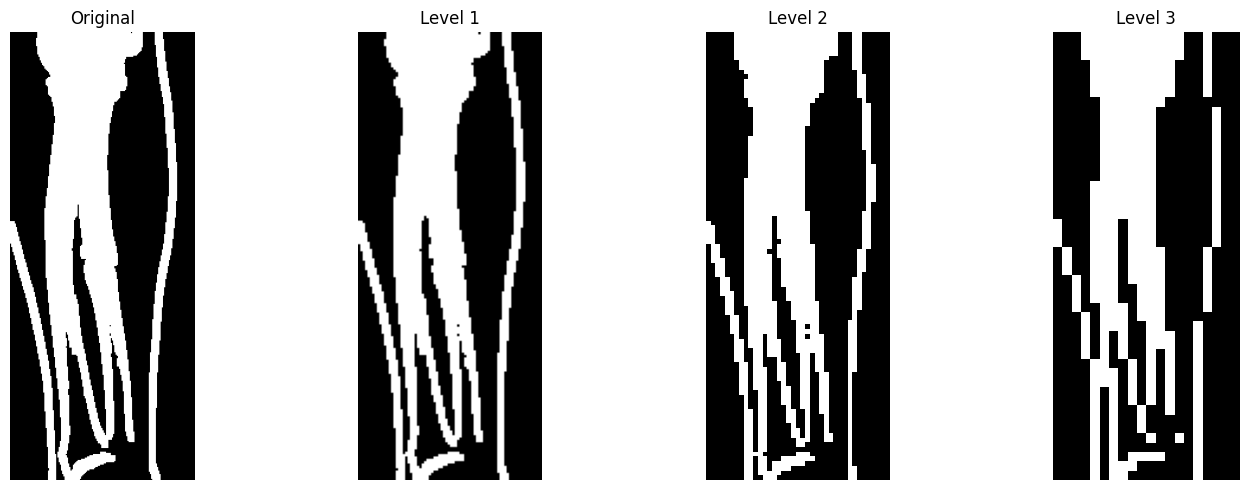

processed_kirik_2_level_0.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png
processed_kirik_2_level_1.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png
processed_kirik_2_level_2.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png
processed_kirik_2_level_3.png kaydedildi: C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png


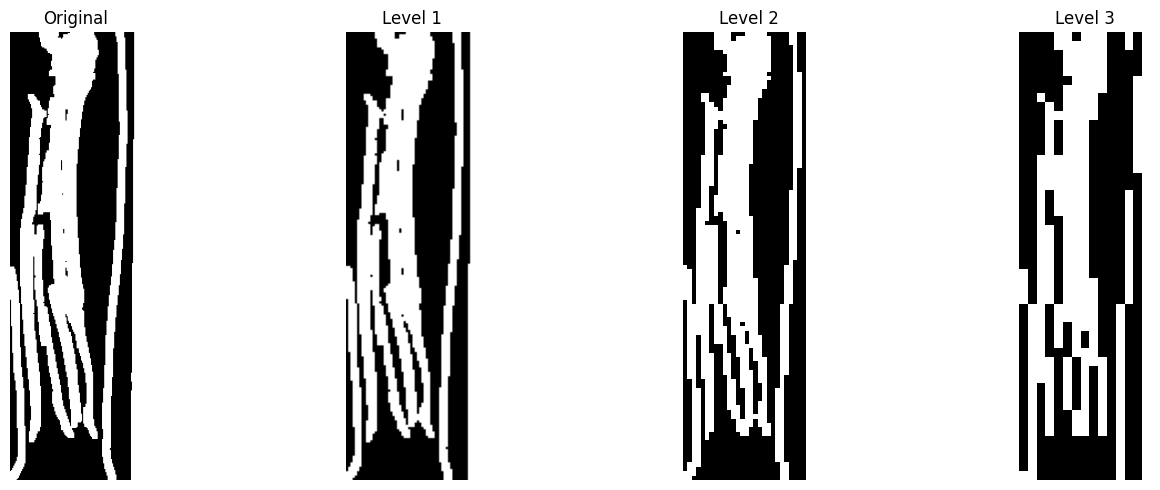

In [8]:
from skimage import io, color
import matplotlib.pyplot as plt
import os

# Görsellerin dosya yolları
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2.png"
]

# Çıktıların kaydedileceği klasör
output_folder = r"C:\Users\songu\Downloads\images"

# Gauss Piramidi oluşturma fonksiyonu
def create_gaussian_pyramid(image, pyramid_levels, scale_factors):
    pyramid = [image]
    for scale in scale_factors:
        scaled_image = image[::int(1 / scale), ::int(1 / scale)]
        pyramid.append(scaled_image)
    return pyramid

# Her bir görüntü için işlem yapma
for image_path in image_paths:
    # Görseli oku
    image = io.imread(image_path)
    image_name = os.path.splitext(os.path.basename(image_path))[0]  # Görsel ismi

    # Alfa kanalını kaldır ve sadece RGB kanallarını al
    if image.shape[2] == 4:
        image = image[:, :, :3]

    # Görseli gri tonlamaya çevir
    image_gray = color.rgb2gray(image)

    # Gauss Piramidi Oluşturma
    pyramid_levels = 3  # Piramit seviyesi sayısı
    scale_factors = [0.5, 0.25, 0.125]  # Seviyeler arasındaki farkı belirler
    pyramid = create_gaussian_pyramid(image_gray, pyramid_levels, scale_factors)

    # Görselleri görselleştirme ve kaydetme
    fig, axes = plt.subplots(1, pyramid_levels + 1, figsize=(15, 5))  # Orijinal + 3 seviye
    for i, ax in enumerate(axes):
        ax.imshow(pyramid[i], cmap='gray')
        if i == 0:
            ax.set_title("Original")
        else:
            ax.set_title(f'Level {i}')
        ax.axis('off')
        
        # Görseli dosyaya kaydet
        level_filename = f"{image_name}_level_{i}.png"
        level_path = os.path.join(output_folder, level_filename)
        io.imsave(level_path, (pyramid[i] * 255).astype("uint8"))  # Görselleri kaydet
        print(f"{level_filename} kaydedildi: {level_path}")

    plt.tight_layout()
    plt.show()  # Tüm seviyeleri göster
